In [23]:
import os 
import numpy as np
import cv2 
import gc 

In [24]:
data=np.load("./data/data_preprocess.npz")

In [25]:
X=data['arr_0']
y=data['arr_1']

In [26]:
X.shape,y.shape

((9959, 100, 100, 3), (9959,))

In [27]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [28]:
from sklearn.preprocessing import OneHotEncoder


In [29]:
onehot=OneHotEncoder()
y_onehot=onehot.fit_transform(y.reshape(-1,1))

In [30]:
y_array=y_onehot.toarray()

In [31]:
y_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [32]:
y_array.shape

(9959, 4)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_array,test_size=0.2,random_state=42)

In [34]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7967, 100, 100, 3), (7967, 4), (1992, 100, 100, 3), (1992, 4))

In [35]:
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras import Sequential

In [36]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy']             
)

D:\Face Mask\facemask\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 100, 100, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 192)                 │       1,769,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 28)                  │           5,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │             116 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,798,768 (6.86 MB)

 Trainable params: 1,798,768 (6.86 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history=model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 57s 98ms/step - accuracy: 0.8404 - loss: 0.4166 - val_accuracy: 0.9744 - val_loss: 0.0917
Epoch 2/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.9693 - loss: 0.0983 - val_accuracy: 0.9729 - val_loss: 0.0812
Epoch 3/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - accuracy: 0.9801 - loss: 0.0535 - val_accuracy: 0.9759 - val_loss: 0.0737
Epoch 4/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.9900 - loss: 0.0296 - val_accuracy: 0.9699 - val_loss: 0.1007
Epoch 5/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9908 - loss: 0.0208 - val_accuracy: 0.9714 - val_loss: 0.1156
Epoch 6/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9910 - loss: 0.0253 - val_accuracy: 0.9864 - val_loss: 0.0475
Epoch 7/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9962 - loss: 0.0102 - val_accuracy: 0.9900 - val_loss: 0.0427
Epoch 8/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9980 - loss: 0.0062 - 

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [42]:
history_df=pd.DataFrame(history.history)

In [44]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.926070,0.208204,0.974398,0.091704
1,0.976277,0.076988,0.972892,0.081190
2,0.982679,0.048040,0.975904,0.073747
3,0.988954,0.031120,0.969880,0.100672
4,0.991716,0.021620,0.971386,0.115597
5,0.992720,0.019030,0.986446,0.047498
6,0.994352,0.014765,0.989960,0.042682
7,0.996234,0.010578,0.978916,0.080554
8,0.997239,0.009701,0.985442,0.069313
9,0.997239,0.008749,0.987952,0.063162


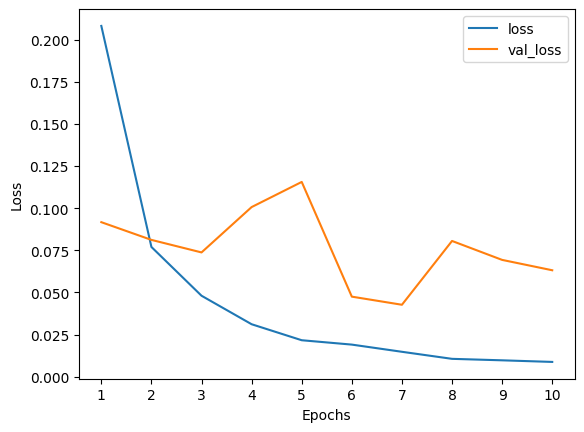

In [46]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

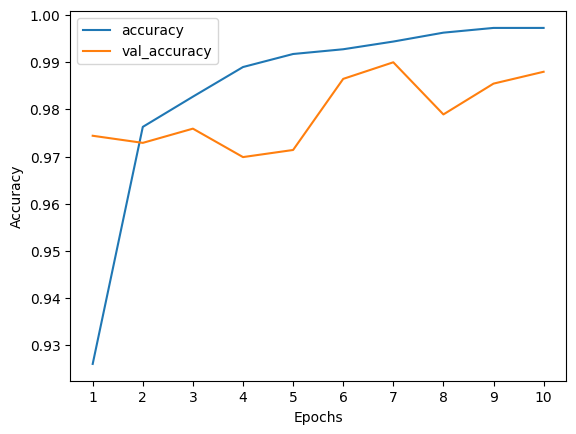

In [47]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [51]:
model.export('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


INFO:tensorflow:Assets written to: face_cnn_model\assets


Saved artifact at 'face_cnn_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_44')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2664245880864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2664245884208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2664245876112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2664245886672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2665509618784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2665509618256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2665509620368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2665509618960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2665509623184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2665509618080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2665509625120: TensorSpec(shape=(

In [52]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]